# CEMS

In [71]:
# imports
import os
import numpy as np
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

import iris
import iris.quickplot as qplt
import iris.plot as iplt

from oceanpy.sst import io as sst_io

In [47]:
%matplotlib notebook

In [57]:
path = '/home/xavier/Projects/Oceanography/data/CEMS-LENS/Z500'

# Load

In [58]:
zfile = os.path.join(path, 'b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h1.Z500.19200101-20051231.nc')

In [59]:
cubes = iris.load(zfile)

/home/xavier/anaconda3/lib/python3.7/site-packages/iris/fileformats/cf.py:561: UserWarning: Missing CF-netCDF formula term variable 'PS', referenced by netCDF variable 'ilev'
  warnings.warn(message % (variable_name, nc_var_name))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/fileformats/cf.py:561: UserWarning: Missing CF-netCDF formula term variable 'PS', referenced by netCDF variable 'lev'
  warnings.warn(message % (variable_name, nc_var_name))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2342: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2342: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly mon

In [6]:
cubes

Number Of Longitudes (1),latitude
Shape,192
Dimension coordinates,
latitude,x
Attributes,
Conventions,CF-1.0
NCO,4.3.4
Version,$Name$
case,b.e11.B20TRC5CNBDRD.f09_g16.008
history,Sat Oct 19 18:38:45 2013: /glade/apps/opt/nco/4.3.4/gnu/nco-4.3.4/bin/ncks...
host,ys0104


# Explore

In [8]:
lat = cubes[0]
lat

Number Of Longitudes (1),latitude
Shape,192
Dimension coordinates,
latitude,x
Attributes,
Conventions,CF-1.0
NCO,4.3.4
Version,$Name$
case,b.e11.B20TRC5CNBDRD.f09_g16.008
history,Sat Oct 19 18:38:45 2013: /glade/apps/opt/nco/4.3.4/gnu/nco-4.3.4/bin/ncks...
host,ys0104


In [63]:
cubes[19].name()

'current date (YYYYMMDD)'

In [10]:
z500 = cubes[12]
z500

<iris 'Cube' of Geopotential Z at 500 mbar pressure surface / (m) (-- : 31390; latitude: 192; longitude: 288)>

### Grab a day

In [33]:
z500[31000]

<iris 'Cube' of Geopotential Z at 500 mbar pressure surface / (m) (latitude: 192; longitude: 288)>

### Plot

<IPython.core.display.Javascript object>


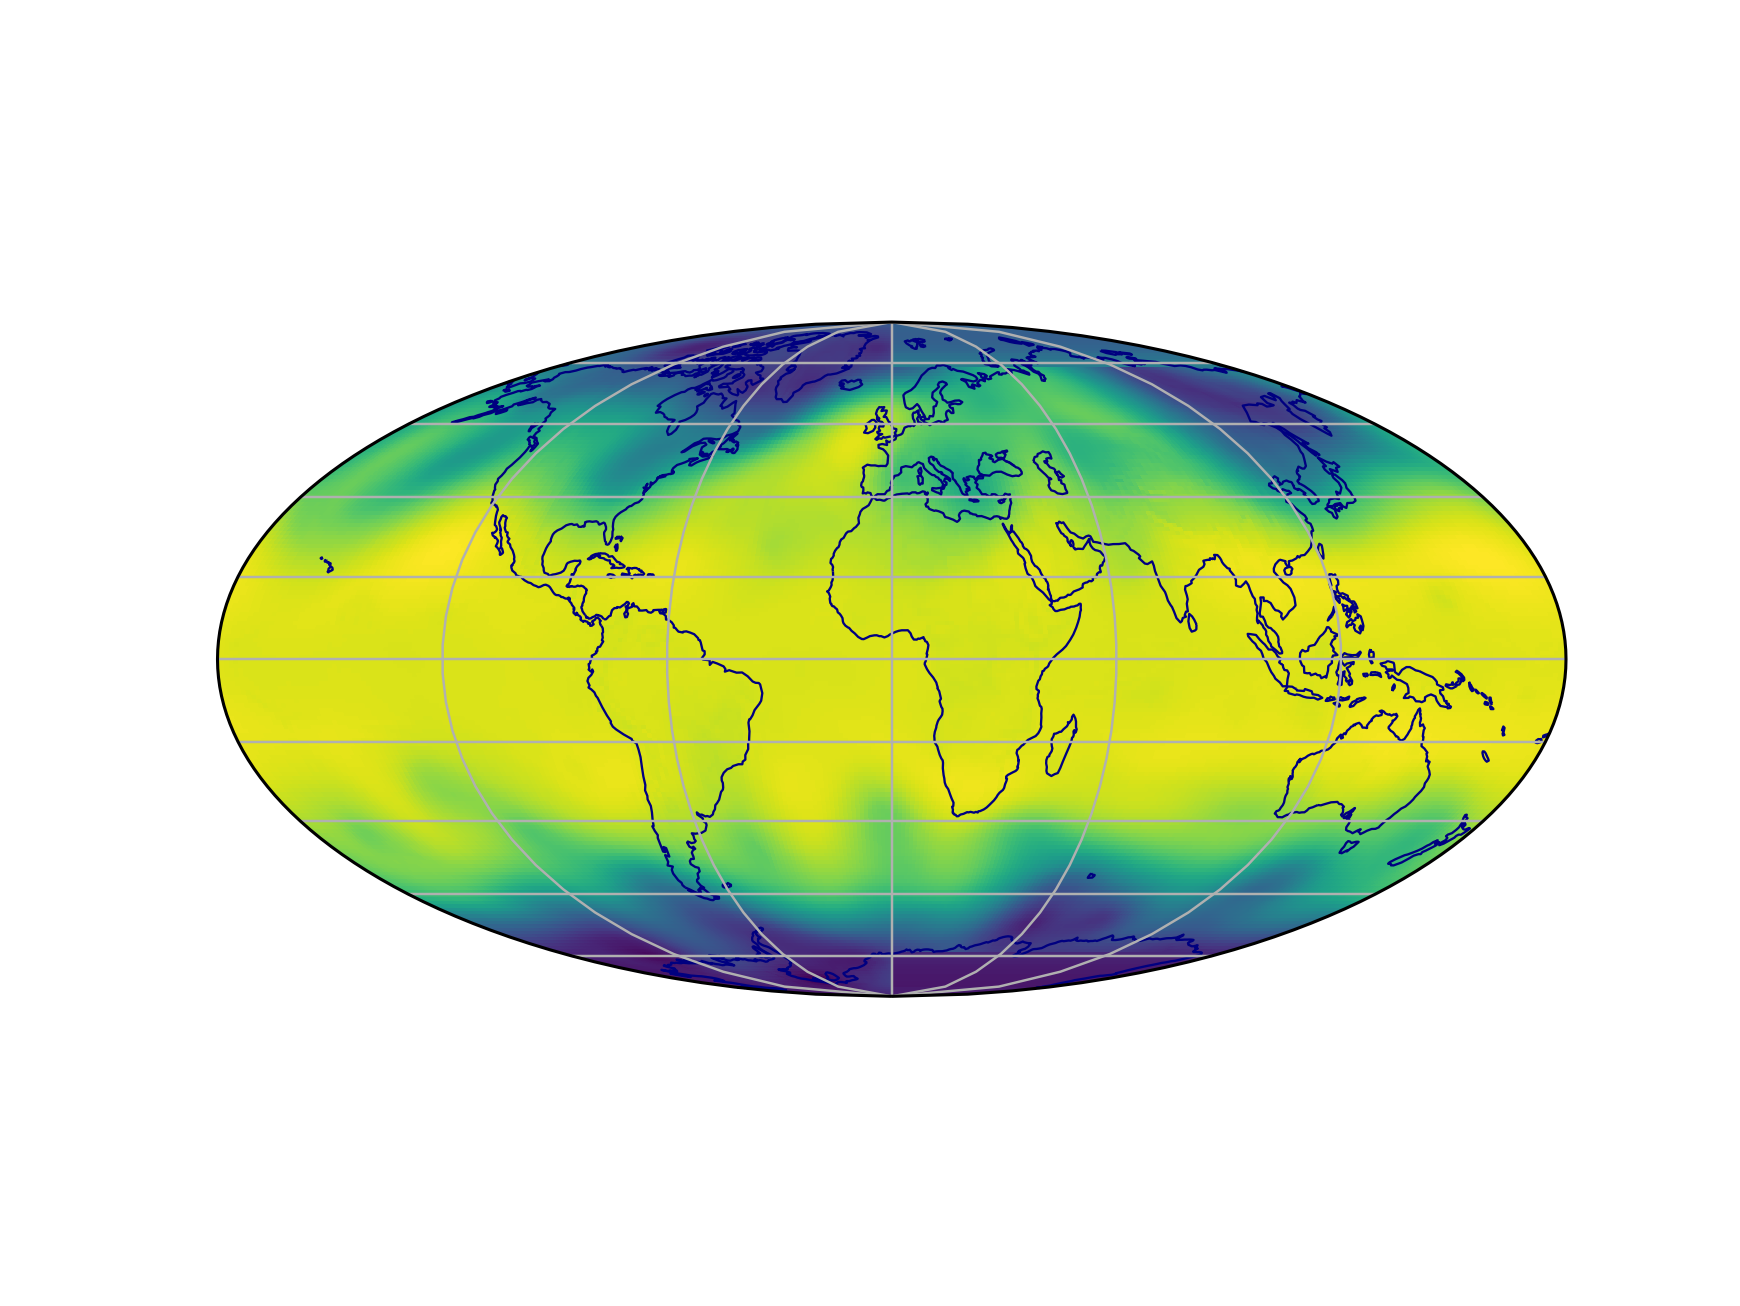

/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [48]:
# Define a Cartopy 'ordinary' lat-lon coordinate reference system.
crs_latlon = ccrs.PlateCarree()
#
plt.clf()
#ax = plt.gca()
ax = plt.axes(projection=ccrs.Mollweide())
ax.gridlines(crs=crs_latlon, linestyle='-')
ax.coastlines(linewidth=0.75, color='navy')
iplt.pcolormesh(z500[31000])

## Time

In [11]:
time = cubes[19]
time

Current Date (Yyyymmdd) (1),--
Shape,31390
Auxiliary coordinates,
time,x
Attributes,
Conventions,CF-1.0
NCO,4.3.4
Version,$Name$
case,b.e11.B20TRC5CNBDRD.f09_g16.008
history,Sat Oct 19 18:38:45 2013: /glade/apps/opt/nco/4.3.4/gnu/nco-4.3.4/bin/ncks...
host,ys0104


In [12]:
t = time.data[:]

In [73]:
np.where(t == 20051229)[0][0]

31387

# Regrid

## Load NOAA as new grid

In [51]:
any_sst = sst_io.load_noaa((1,1,2005))

In [52]:
any_sst

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (latitude: 720; longitude: 1440)>

## Do it

In [53]:
tmp = z500[31000]

In [54]:
z500_on_noaa = tmp.regrid(any_sst, iris.analysis.Linear())

In [55]:
z500_on_noaa

<iris 'Cube' of Geopotential Z at 500 mbar pressure surface / (m) (latitude: 720; longitude: 1440)>

## Plot

<IPython.core.display.Javascript object>


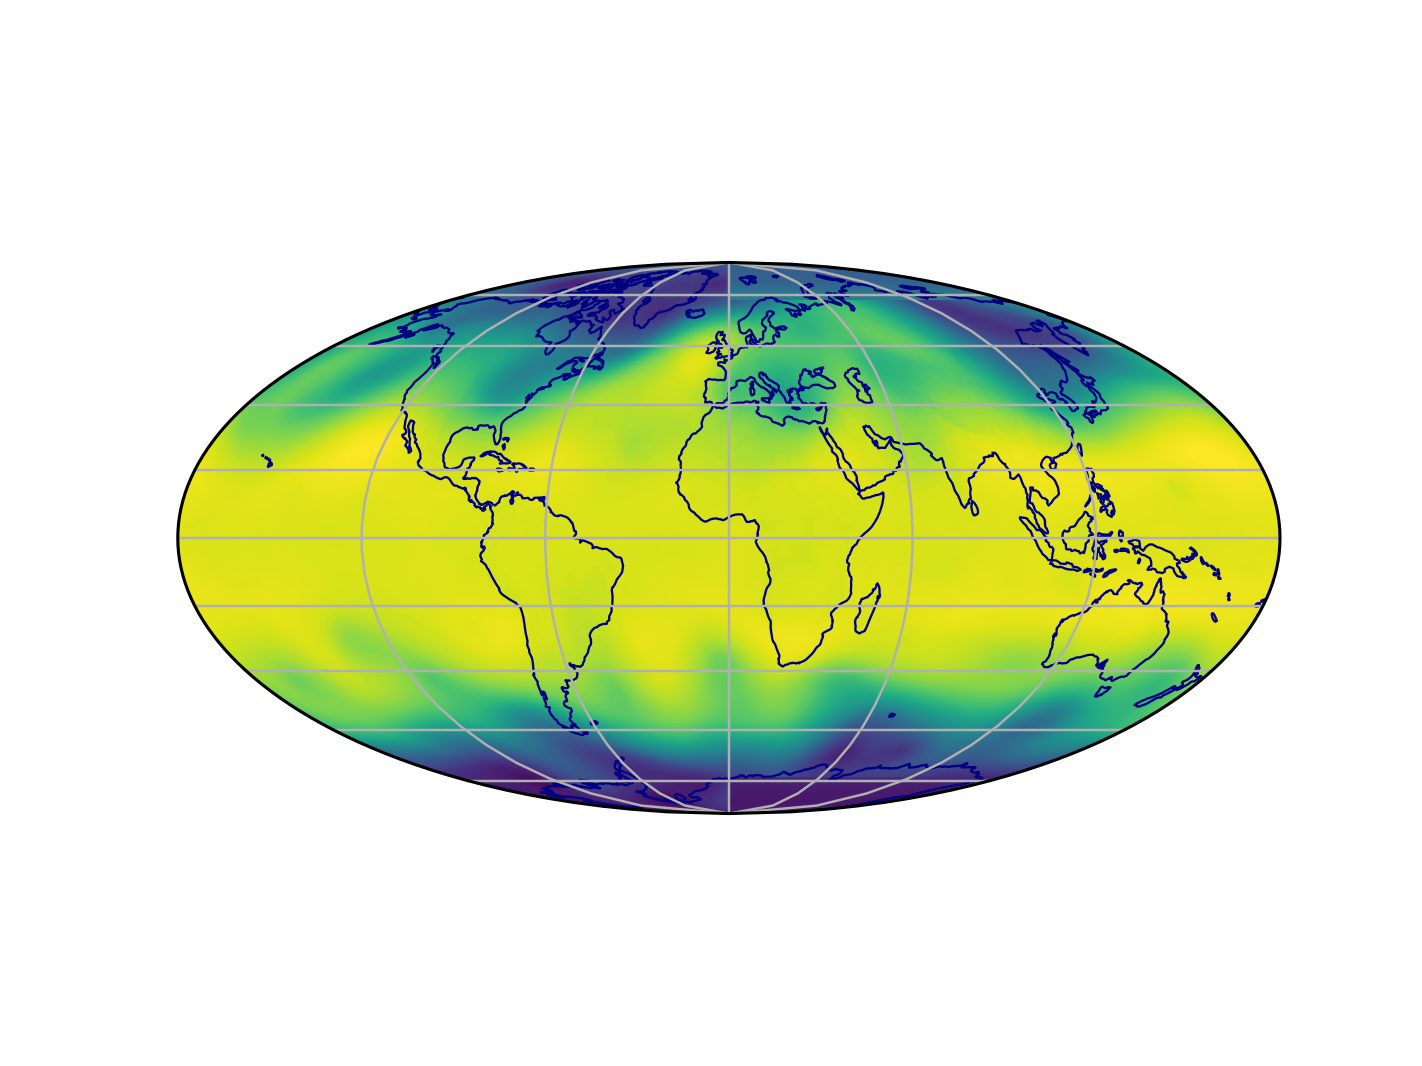

/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [56]:
# Define a Cartopy 'ordinary' lat-lon coordinate reference system.
crs_latlon = ccrs.PlateCarree()
#
plt.clf()
#ax = plt.gca()
ax = plt.axes(projection=ccrs.Mollweide())
ax.gridlines(crs=crs_latlon, linestyle='-')
ax.coastlines(linewidth=0.75, color='navy')
iplt.pcolormesh(z500_on_noaa)

In [65]:
names = [cube.name() for cube in cubes]
names

['number of longitudes',
 'seconds of base date',
 'current seconds of current day',
 'f11 volume mixing ratio',
 'time_written',
 'ch4 volume mixing ratio',
 'date_written',
 'cutoff Fourier wavenumber',
 'spectral truncation parameter N',
 'f12 volume mixing ratio',
 'base day',
 'base date (YYYYMMDD)',
 'Geopotential Z at 500 mbar pressure surface',
 'current day (from base day)',
 'timestep',
 'spectral truncation parameter M',
 'gauss weights',
 'n2o volume mixing ratio',
 'total solar irradiance',
 'current date (YYYYMMDD)',
 'seconds of base day',
 'current seconds of current date',
 'current timestep',
 'staggered latitude weights',
 'co2 volume mixing ratio',
 'spectral truncation parameter K']

In [67]:
didx = names.index('Geopotential Z at 500 mbar pressure surface')
didx

12